- https://github.com/facebookresearch/faiss/wiki/Getting-started

In [ ]:
d = 1000
index = faiss.IndexFlatL2(d)
print(index.is_trained)

True


In [ ]:
# Walk into directoies to find images and convert them to vectors
image_paths = []
for root, dirs, files in os.walk('datasets/'):
    for file in files:
        if file.endswith((".jpg", ".tif", ".png")):
            file_path = os.path.join(root, file)
            image_paths.append(file_path)

            img = torch.tensor(np.array(Image.open(file_path)), dtype=torch.float32)[:,:,:3]
            img = img.permute(2, 0, 1).unsqueeze(0)

            with torch.no_grad():
                feature = model(img.to(device)).detach().cpu().numpy()
            index.add(feature)

print(index.ntotal, ' Images Found!')

5071  Images Found!


### Search

In [ ]:
query_image_path = 'datasets/RESISC45_partial/ship/ship_608.jpg'
query = torch.tensor(np.array(Image.open(query_image_path)), dtype=torch.float32)[:,:,:3]
query = query.permute(2, 0, 1).unsqueeze(0)
with torch.no_grad():
    query_feature = model(query.to(device)).detach().cpu().numpy()

In [ ]:
k = 20
D, I = index.search(query_feature, k)

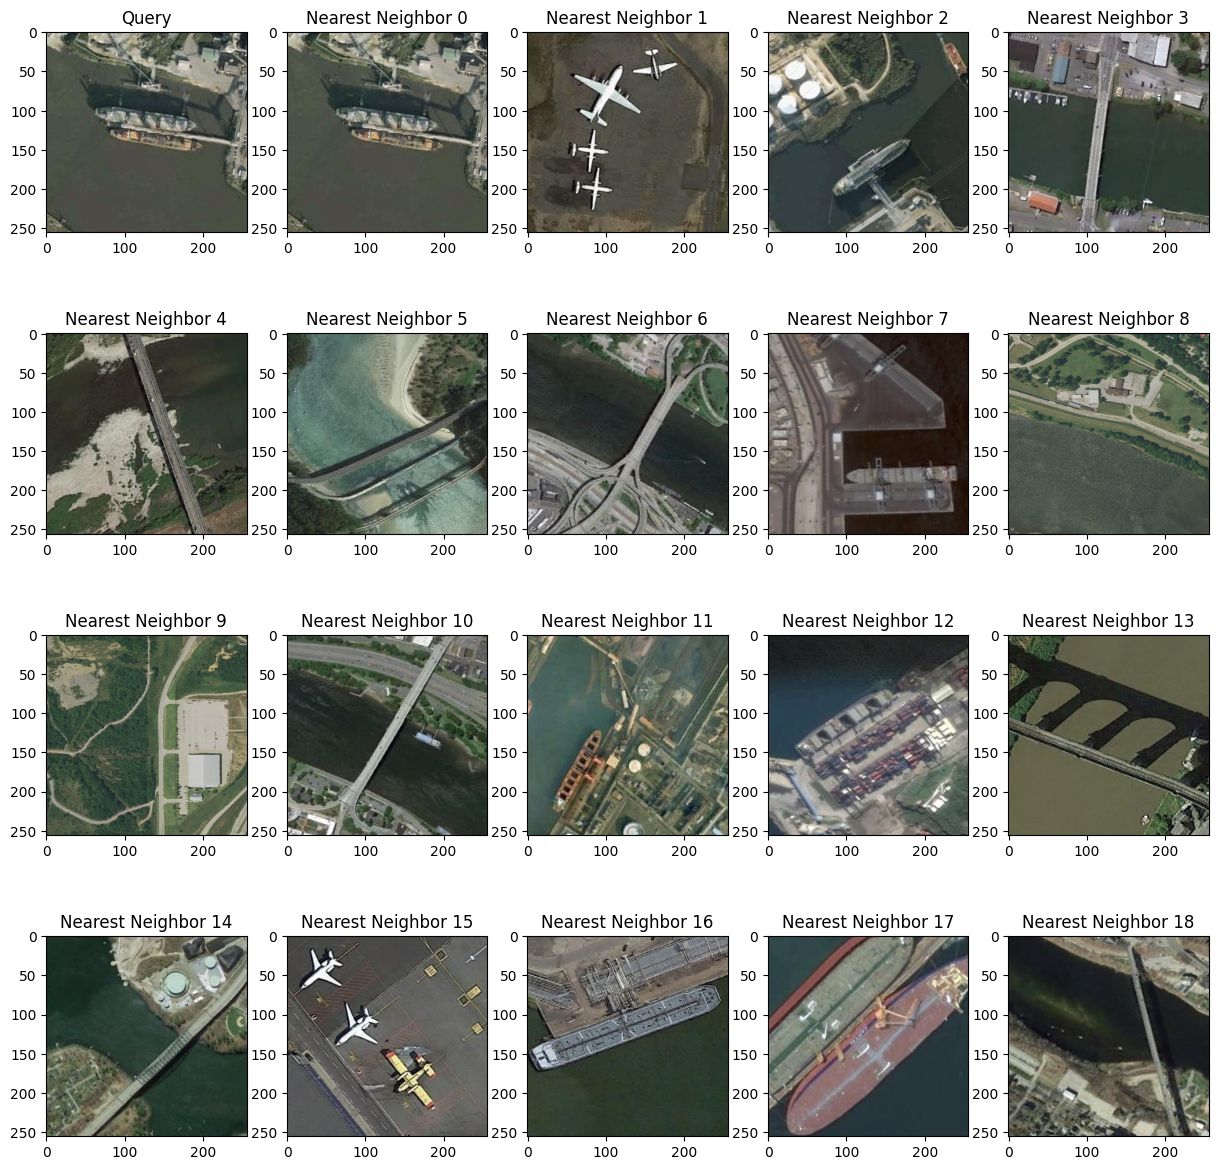

In [ ]:
# Plot query image
query_image = Image.open(query_image_path)

rows, columns = 4, 5
fig, axs = plt.subplots(rows, columns, figsize=(15, 15))


n = 0
for i in range(rows):
    for j in range(columns):
        if (i == 0) and (j == 0):
            axs[0][0].imshow(query_image)
            axs[0][0].set_title(f'Query')
        else:
            axs[i][j].imshow(Image.open(image_paths[I[0][n]]))
            axs[i][j].set_title(f'Nearest Neighbor {n}')
            n += 1
plt.show()